<a href="https://colab.research.google.com/github/mainakdeykol/demo/blob/main/Copy_of_cat_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip '/content/drive/MyDrive/Colab Notebooks/Data/kagglecatsanddogs_5340.zip'

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import tqdm
import os
import random
from tensorflow.keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [5]:
input_path=[]
label=[]
for class_name in os.listdir('PetImages'):
    for path in os.listdir('PetImages/'+class_name):
        if class_name=='Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages",class_name,path))

print(input_path[37],label[37])

PetImages/Dog/320.jpg 1


In [6]:
len(input_path)

25002

In [7]:
len(label)

25002

In [8]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0  PetImages/Dog/7408.jpg      1
1  PetImages/Cat/4030.jpg      0
2  PetImages/Cat/7879.jpg      0
3  PetImages/Cat/8505.jpg      0
4  PetImages/Cat/4876.jpg      0

In [9]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [10]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db']

In [11]:
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Dog/11702.jpg']
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
len(df)

24998

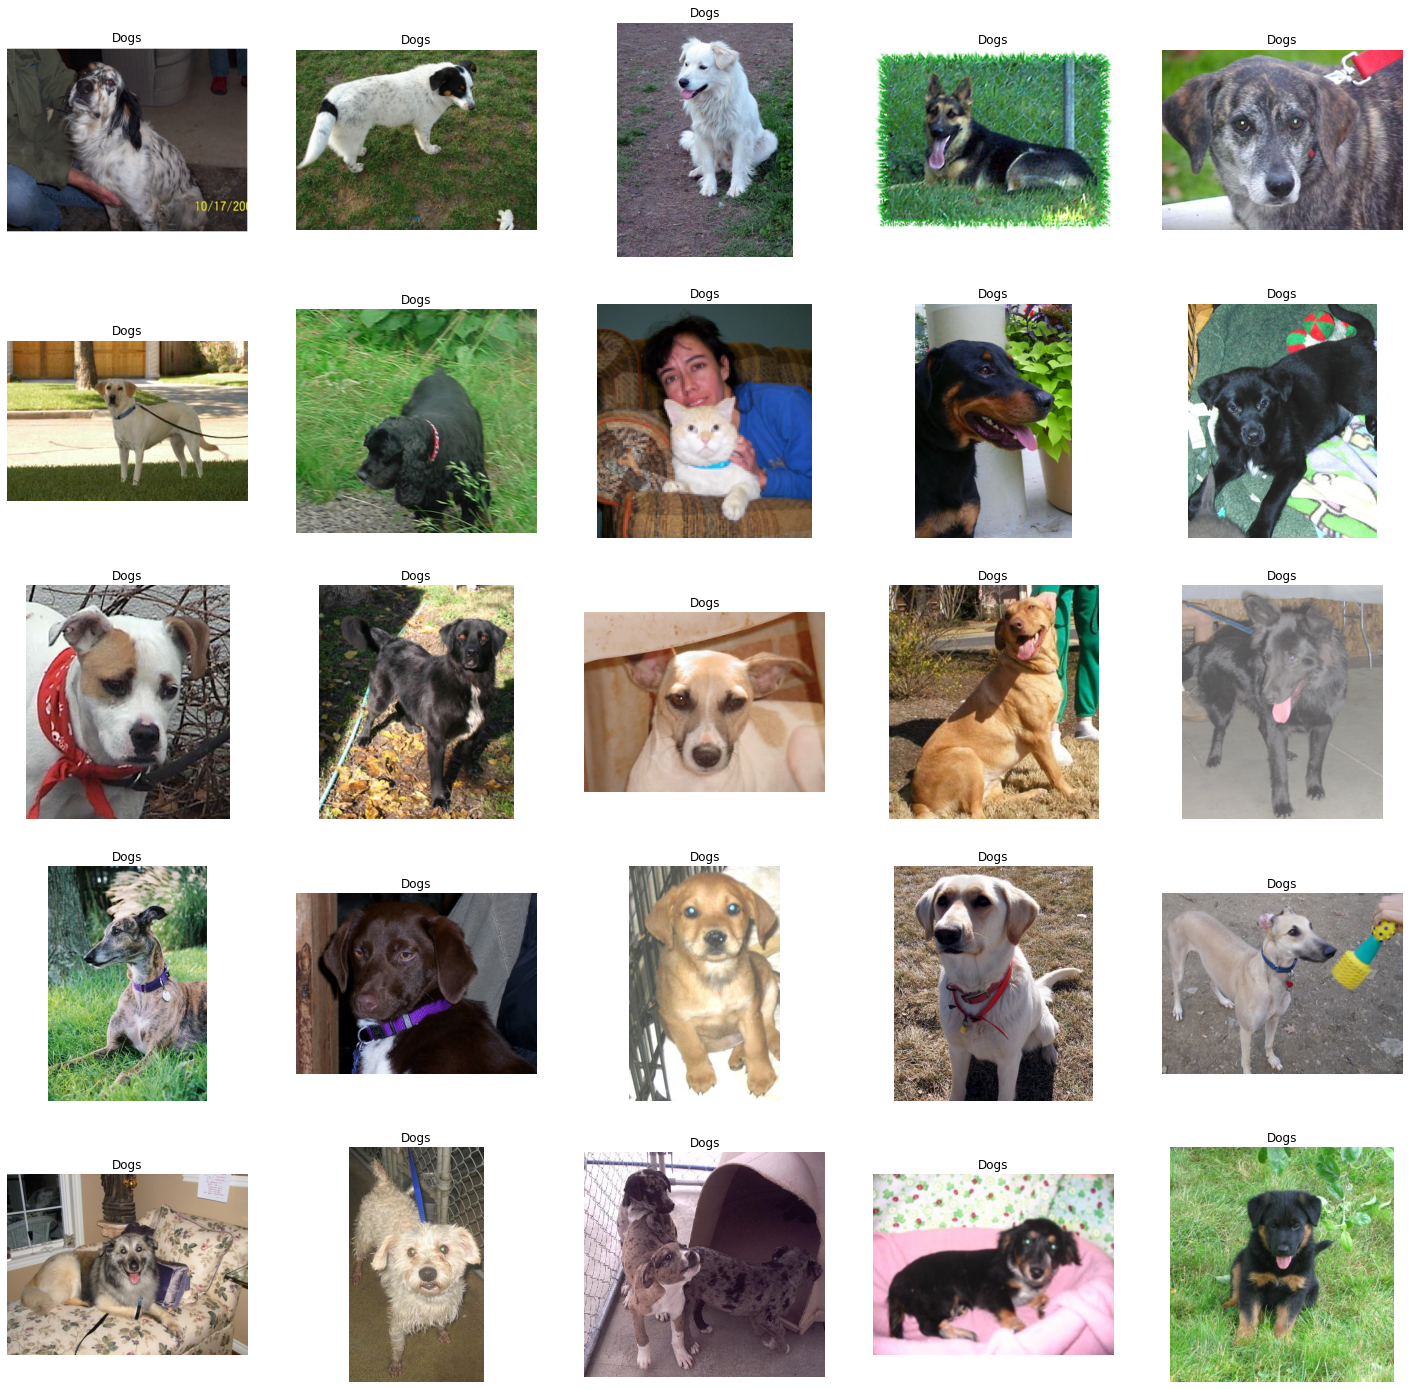

In [12]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

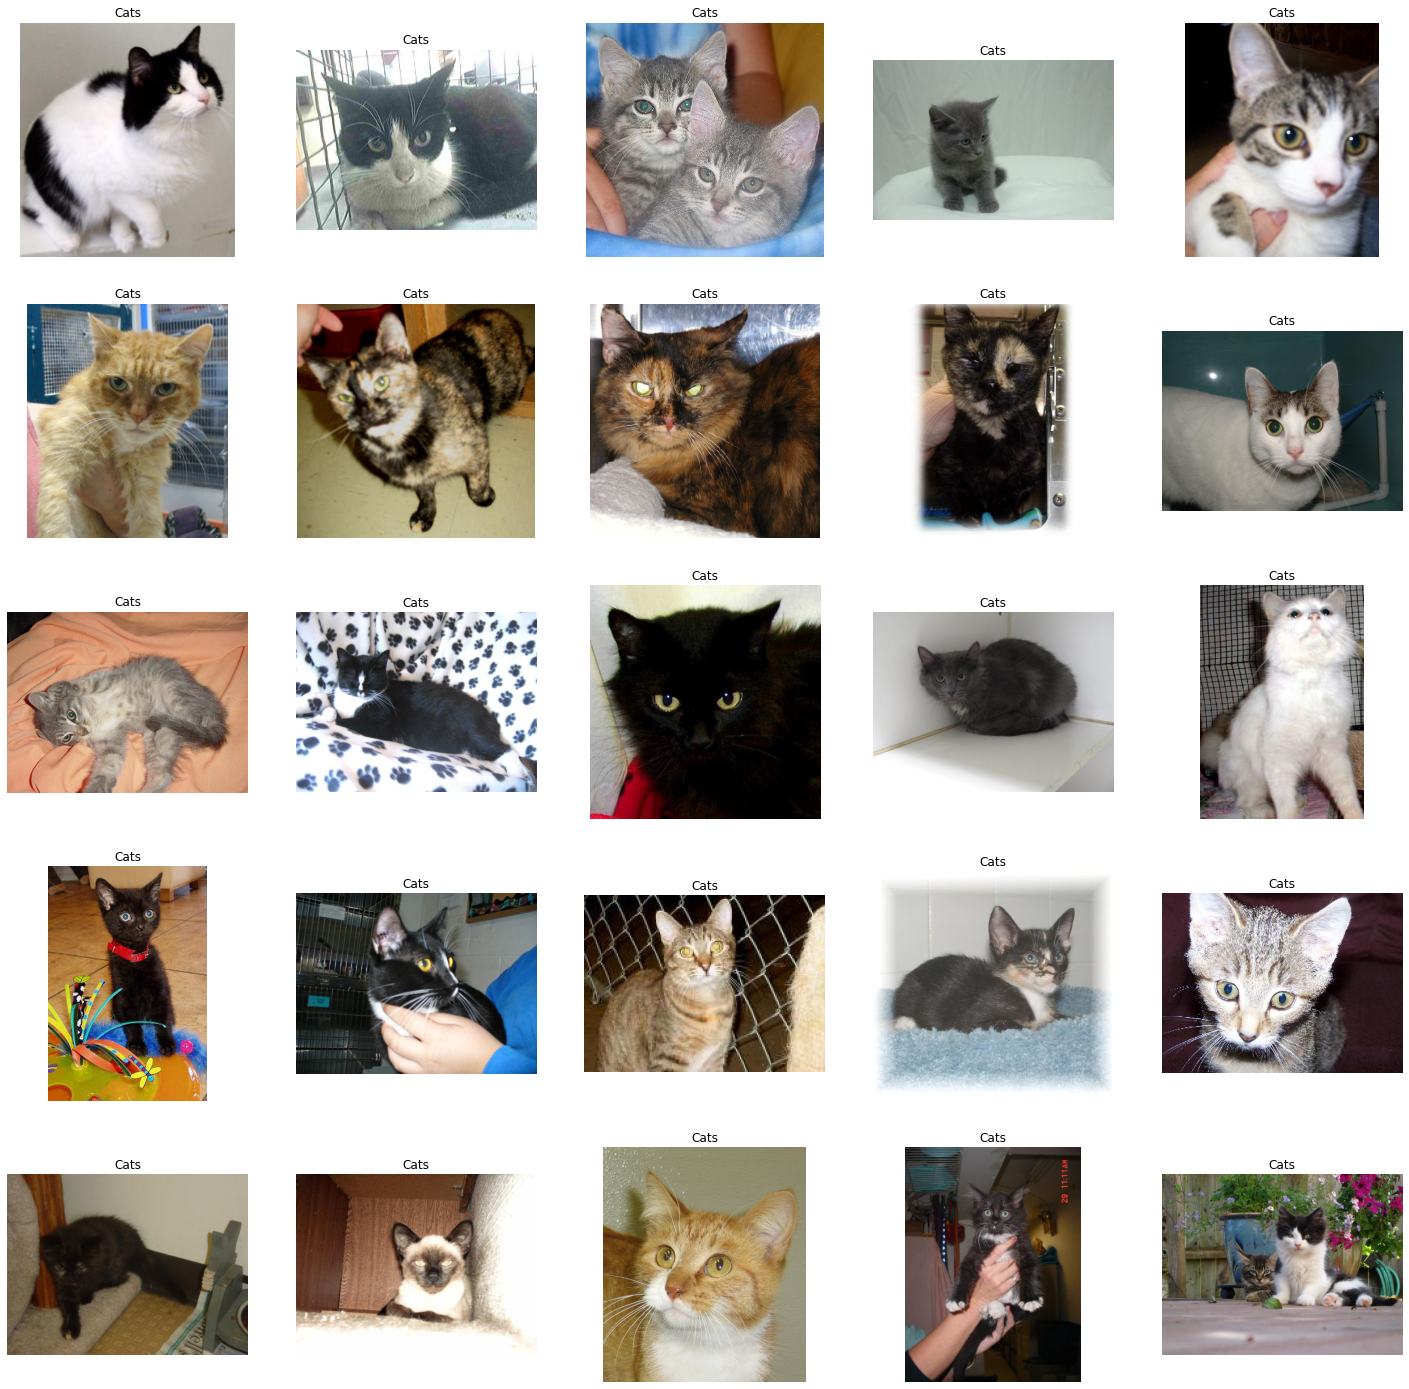

In [13]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

<Axes: ylabel='count'>

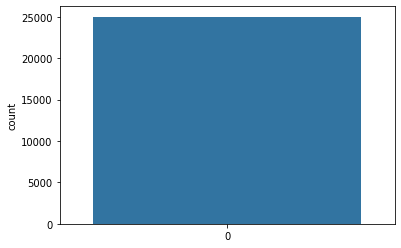

In [44]:
import seaborn as sns
sns.countplot(df['label'])

In [15]:
df['label'] = df['label'].astype('str')

In [16]:
df.head()

images label
0  PetImages/Dog/7408.jpg     1
1  PetImages/Cat/4030.jpg     0
2  PetImages/Cat/7879.jpg     0
3  PetImages/Cat/8505.jpg     0
4  PetImages/Cat/4876.jpg     0

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
train.head()

images label
23290   PetImages/Dog/6609.jpg     1
17785   PetImages/Cat/3121.jpg     0
1020    PetImages/Dog/9806.jpg     1
12648  PetImages/Dog/11749.jpg     1
1533    PetImages/Cat/2552.jpg     0

In [ ]:
test.head()

images label
6868    PetImages/Cat/2740.jpg     0
22914   PetImages/Dog/1052.jpg     1
9669    PetImages/Dog/1841.jpg     1
13639  PetImages/Dog/10413.jpg     1
23341   PetImages/Cat/4014.jpg     0

In [19]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=128, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [20]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [22]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

Epoch 1/50
40/40 [==============================] - 153s 3s/step - loss: 0.7205 - accuracy: 0.5484 - val_loss: 0.6477 - val_accuracy: 0.6422
Epoch 2/50
40/40 [==============================] - 140s 4s/step - loss: 0.6047 - accuracy: 0.6737 - val_loss: 0.5709 - val_accuracy: 0.7044
Epoch 3/50
40/40 [==============================] - 141s 4s/step - loss: 0.5928 - accuracy: 0.6870 - val_loss: 0.5466 - val_accuracy: 0.7240
Epoch 4/50
40/40 [==============================] - 140s 4s/step - loss: 0.5636 - accuracy: 0.7110 - val_loss: 0.5204 - val_accuracy: 0.7410
Epoch 5/50
40/40 [==============================] - 146s 4s/step - loss: 0.5302 - accuracy: 0.7382 - val_loss: 0.4956 - val_accuracy: 0.7562
Epoch 6/50
40/40 [==============================] - 140s 4s/step - loss: 0.5068 - accuracy: 0.7502 - val_loss: 0.5003 - val_accuracy: 0.7606
Epoch 7/50
40/40 [==============================] - 141s 4s/step - loss: 0.4967 - accuracy: 0.7548 - val_loss: 0.4542 - val_accuracy: 0.7872
Epoch 8/50
40

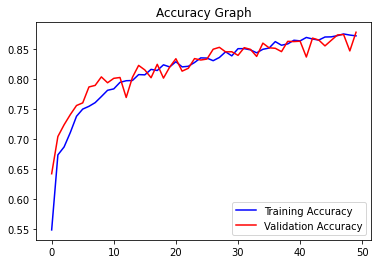

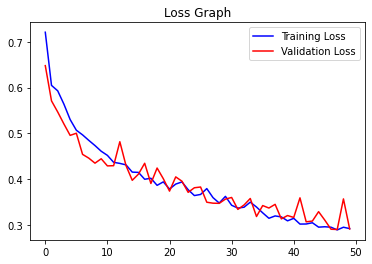

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [24]:
model.save('/content/drive/MyDrive/Colab Notebooks/Model/cat_dog_predict_model_50.h5')

In [25]:
from keras.models import load_model
new_model=load_model('/content/drive/MyDrive/Colab Notebooks/Model/cat_dog_predict_model_50.h5')

1/1 [==============================] - 0s 162ms/step
Dog


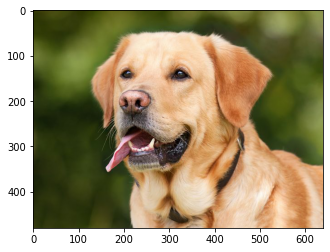

In [26]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Data/test1.jpg" 
imge=plt.imread(image_path)
plt.imshow(imge)
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 
img = img.reshape(1, 128, 128, 3) 
pred = new_model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)

1/1 [==============================] - 0s 20ms/step
Cat


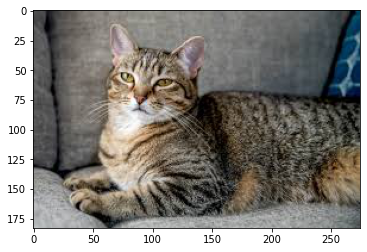

In [27]:
image_path = "/content/drive/MyDrive/Colab Notebooks/Data/test2.jpg" 
imge=plt.imread(image_path)
plt.imshow(imge)
img = load_img(image_path, target_size=(128, 128))
img = np.array(img)
img = img / 255.0 
img = img.reshape(1, 128, 128, 3) 
pred = new_model.predict(img)
if pred[0] > 0.5:
    label = 'Dog'
else:
    label = 'Cat'
print(label)